In [2]:
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
!unzip ISIC2018_Task3_Training_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
!unzip ISIC2018_Task3_Training_GroundTruth.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
!unzip ISIC2018_Task3_Validation_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
!unzip ISIC2018_Task3_Validation_GroundTruth.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
!unzip ISIC2018_Task3_Test_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip
!unzip ISIC2018_Task3_Test_GroundTruth.zip

!rm ISIC2018_Task3_Training_Input/ATTRIBUTION.txt
!rm ISIC2018_Task3_Validation_Input/ATTRIBUTION.txt
!rm ISIC2018_Task3_Test_Input/ATTRIBUTION.txt
!rm ISIC2018_Task3_Training_Input/LICENSE.txt
!rm ISIC2018_Task3_Validation_Input/LICENSE.txt
!rm ISIC2018_Task3_Test_Input/LICENSE.txt

Streaming output truncated to the last 5000 lines.
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031105.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031106.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031107.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031108.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031109.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031110.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031111.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031112.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031113.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031114.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031115.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031116.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031117.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031118.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031119.jpg  
 extracting: ISIC20

In [3]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
tr_df = pd.read_csv('/content/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv')

tr_image = tr_df['image'].tolist()
tr_MEL = tr_df['MEL'].tolist()
tr_NV = tr_df['NV'].tolist()
tr_BCC = tr_df['BCC'].tolist()
tr_AKIEC = tr_df['AKIEC'].tolist()
tr_BKL = tr_df['BKL'].tolist()
tr_DF = tr_df['DF'].tolist()
tr_VASC = tr_df['VASC'].tolist()

tr_data = {}
for i in range(len(tr_image)):
  tr_data[tr_image[i]] = [tr_MEL[i], tr_NV[i], tr_BCC[i], tr_AKIEC[i], tr_BKL[i], tr_DF[i], tr_VASC[i]]

tr_MEL = {'imgpath': [] , 'labels': [] }
tr_NV = {'imgpath': [] , 'labels': [] }
tr_BCC = {'imgpath': [] , 'labels': [] }
tr_AKIEC = {'imgpath': [] , 'labels': [] }
tr_BKL = {'imgpath': [] , 'labels': [] }
tr_DF = {'imgpath': [] , 'labels': [] }
tr_VASC = {'imgpath': [] , 'labels': [] }

for file in os.listdir('ISIC2018_Task3_Training_Input'):
  tr_MEL['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_NV['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_BCC['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_AKIEC['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_BKL['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_DF['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))
  tr_VASC['imgpath'].append(os.path.join('ISIC2018_Task3_Training_Input', file))

  tr_MEL['labels'].append(tr_data[file.split('.')[0]][0])
  tr_NV['labels'].append(tr_data[file.split('.')[0]][1])
  tr_BCC['labels'].append(tr_data[file.split('.')[0]][2])
  tr_AKIEC['labels'].append(tr_data[file.split('.')[0]][3])
  tr_BKL['labels'].append(tr_data[file.split('.')[0]][4])
  tr_DF['labels'].append(tr_data[file.split('.')[0]][5])
  tr_VASC['labels'].append(tr_data[file.split('.')[0]][6])

tr_df_MEL = pd.DataFrame(tr_MEL)
tr_df_NV = pd.DataFrame(tr_NV)
tr_df_BCC = pd.DataFrame(tr_BCC)
tr_df_AKIEC = pd.DataFrame(tr_AKIEC)
tr_df_BKL = pd.DataFrame(tr_BKL)
tr_df_DF = pd.DataFrame(tr_DF)
tr_df_VASC = pd.DataFrame(tr_VASC)

lb = LabelEncoder()
tr_df_MEL['encoded_labels'] = lb.fit_transform(tr_df_MEL['labels'])
tr_df_NV['encoded_labels'] = lb.fit_transform(tr_df_NV['labels'])
tr_df_BCC['encoded_labels'] = lb.fit_transform(tr_df_BCC['labels'])
tr_df_AKIEC['encoded_labels'] = lb.fit_transform(tr_df_AKIEC['labels'])
tr_df_BKL['encoded_labels'] = lb.fit_transform(tr_df_BKL['labels'])
tr_df_DF['encoded_labels'] = lb.fit_transform(tr_df_DF['labels'])
tr_df_VASC['encoded_labels'] = lb.fit_transform(tr_df_VASC['labels'])


In [5]:
val_df = pd.read_csv('/content/ISIC2018_Task3_Validation_GroundTruth/ISIC2018_Task3_Validation_GroundTruth.csv')

val_image = val_df['image'].tolist()
val_MEL = val_df['MEL'].tolist()
val_NV = val_df['NV'].tolist()
val_BCC = val_df['BCC'].tolist()
val_AKIEC = val_df['AKIEC'].tolist()
val_BKL = val_df['BKL'].tolist()
val_DF = val_df['DF'].tolist()
val_VASC = val_df['VASC'].tolist()

val_data = {}
for i in range(len(val_image)):
  val_data[val_image[i]] = [val_MEL[i], val_NV[i], val_BCC[i], val_AKIEC[i], val_BKL[i], val_DF[i], val_VASC[i]]

val_MEL = {'imgpath': [] , 'labels': [] }
val_NV = {'imgpath': [] , 'labels': [] }
val_BCC = {'imgpath': [] , 'labels': [] }
val_AKIEC = {'imgpath': [] , 'labels': [] }
val_BKL = {'imgpath': [] , 'labels': [] }
val_DF = {'imgpath': [] , 'labels': [] }
val_VASC = {'imgpath': [] , 'labels': [] }

for file in os.listdir('ISIC2018_Task3_Validation_Input'):
  val_MEL['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_NV['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_BCC['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_AKIEC['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_BKL['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_DF['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))
  val_VASC['imgpath'].append(os.path.join('ISIC2018_Task3_Validation_Input', file))

  val_MEL['labels'].append(val_data[file.split('.')[0]][0])
  val_NV['labels'].append(val_data[file.split('.')[0]][1])
  val_BCC['labels'].append(val_data[file.split('.')[0]][2])
  val_AKIEC['labels'].append(val_data[file.split('.')[0]][3])
  val_BKL['labels'].append(val_data[file.split('.')[0]][4])
  val_DF['labels'].append(val_data[file.split('.')[0]][5])
  val_VASC['labels'].append(val_data[file.split('.')[0]][6])

val_df_MEL = pd.DataFrame(val_MEL)
val_df_NV = pd.DataFrame(val_NV)
val_df_BCC = pd.DataFrame(val_BCC)
val_df_AKIEC = pd.DataFrame(val_AKIEC)
val_df_BKL = pd.DataFrame(val_BKL)
val_df_DF = pd.DataFrame(val_DF)
val_df_VASC = pd.DataFrame(val_VASC)

lb = LabelEncoder()
val_df_MEL['encoded_labels'] = lb.fit_transform(val_df_MEL['labels'])
val_df_NV['encoded_labels'] = lb.fit_transform(val_df_NV['labels'])
val_df_BCC['encoded_labels'] = lb.fit_transform(val_df_BCC['labels'])
val_df_AKIEC['encoded_labels'] = lb.fit_transform(val_df_AKIEC['labels'])
val_df_BKL['encoded_labels'] = lb.fit_transform(val_df_BKL['labels'])
val_df_DF['encoded_labels'] = lb.fit_transform(val_df_DF['labels'])
val_df_VASC['encoded_labels'] = lb.fit_transform(val_df_VASC['labels'])



In [6]:
test_df = pd.read_csv('/content/ISIC2018_Task3_Test_GroundTruth/ISIC2018_Task3_Test_GroundTruth.csv')

test_image = test_df['image'].tolist()
test_MEL = test_df['MEL'].tolist()
test_NV = test_df['NV'].tolist()
test_BCC = test_df['BCC'].tolist()
test_AKIEC = test_df['AKIEC'].tolist()
test_BKL = test_df['BKL'].tolist()
test_DF = test_df['DF'].tolist()
test_VASC = test_df['VASC'].tolist()

test_data = {}
for i in range(len(test_image)):
  test_data[test_image[i]] = [test_MEL[i], test_NV[i], test_BCC[i], test_AKIEC[i], test_BKL[i], test_DF[i], test_VASC[i]]

test_MEL = {'imgpath': [] , 'labels': [] }
test_NV = {'imgpath': [] , 'labels': [] }
test_BCC = {'imgpath': [] , 'labels': [] }
test_AKIEC = {'imgpath': [] , 'labels': [] }
test_BKL = {'imgpath': [] , 'labels': [] }
test_DF = {'imgpath': [] , 'labels': [] }
test_VASC = {'imgpath': [] , 'labels': [] }

for file in os.listdir('ISIC2018_Task3_Test_Input'):
  test_MEL['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_NV['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_BCC['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_AKIEC['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_BKL['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_DF['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))
  test_VASC['imgpath'].append(os.path.join('ISIC2018_Task3_Test_Input', file))

  test_MEL['labels'].append(test_data[file.split('.')[0]][0])
  test_NV['labels'].append(test_data[file.split('.')[0]][1])
  test_BCC['labels'].append(test_data[file.split('.')[0]][2])
  test_AKIEC['labels'].append(test_data[file.split('.')[0]][3])
  test_BKL['labels'].append(test_data[file.split('.')[0]][4])
  test_DF['labels'].append(test_data[file.split('.')[0]][5])
  test_VASC['labels'].append(test_data[file.split('.')[0]][6])

test_df_MEL = pd.DataFrame(test_MEL)
test_df_NV = pd.DataFrame(test_NV)
test_df_BCC = pd.DataFrame(test_BCC)
test_df_AKIEC = pd.DataFrame(test_AKIEC)
test_df_BKL = pd.DataFrame(test_BKL)
test_df_DF = pd.DataFrame(test_DF)
test_df_VASC = pd.DataFrame(test_VASC)

lb = LabelEncoder()
test_df_MEL['encoded_labels'] = lb.fit_transform(test_df_MEL['labels'])
test_df_NV['encoded_labels'] = lb.fit_transform(test_df_NV['labels'])
test_df_BCC['encoded_labels'] = lb.fit_transform(test_df_BCC['labels'])
test_df_AKIEC['encoded_labels'] = lb.fit_transform(test_df_AKIEC['labels'])
test_df_BKL['encoded_labels'] = lb.fit_transform(test_df_BKL['labels'])
test_df_DF['encoded_labels'] = lb.fit_transform(test_df_DF['labels'])
test_df_VASC['encoded_labels'] = lb.fit_transform(test_df_VASC['labels'])

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset , DataLoader
from torchvision import transforms
from torchvision.io import read_image
from torchvision.models.swin_transformer import swin_s
import torch.nn.functional as F
from torchvision.utils import make_grid




print(torch.__version__)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

2.2.1+cu121
cpu


In [8]:
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    'valid': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),

}

In [9]:
class lesion_Dataset(Dataset):
    def __init__(self, img_data,transform=None):
        self.transform = transform
        self.img_data = img_data

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, index):
        img_name = self.img_data.loc[index]['imgpath']
        imge = Image.open(img_name)
        image = imge.resize((224,224))
        label = torch.tensor(self.img_data.loc[index]['encoded_labels'])

        if self.transform is not None:
            image = self.transform(image)

        return image, label


In [10]:
def imeshow(inp, mean, std):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0,2)
    plt.imshow(inp)
    plt.show()

In [11]:
def train_model(model, optimizer, criterion , data_loader, device):

    model.train()
    running_loss = 0.0
    correct = 0


    for i, data in enumerate(data_loader):
        inputs , labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item() * inputs.size(0)


    avg_train_loss = running_loss / len(data_loader.dataset)
    avg_train_acc = ( correct / len(data_loader.dataset) ) * 100
    print(">>> Train loss {} ---- Accuracy Train {} ".format(avg_train_loss, avg_train_acc))


    return avg_train_loss , avg_train_acc

In [12]:
def test_model(model, criterion , data_loader, device):

    model.eval()

    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(data_loader):

            inputs , labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        avg_val_acc = ( correct / len(data_loader.dataset) ) * 100
        avg_val_loss = val_loss / len(data_loader.dataset)

        print(">>> Validation loss {} ---- Validation Accuracy {} ".format(avg_val_loss, avg_val_acc))

    return avg_val_loss , avg_val_acc

In [15]:
model = swin_s(pretrained=True)
for param in model.parameters():
  param.requires_grad = False

n_inputs = model.head.in_features
print(n_inputs)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Swin_S_Weights.IMAGENET1K_V1`. You can also use `weights=Swin_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


768


>> Number of Train Data : 10015 -- Batch Size : 200 -- Number of Batch : 51 
>> Number of Validiation Data : 193 -- Batch Size : 100 -- Number of Batch : 2 
>> Number of Test Data : 1512 -- Batch Size : 100 -- Number of Batch : 16 
----------Batch Shape--------
Feature batch shape: torch.Size([200, 3, 224, 224])
----------Labels Shape--------
Labels batch shape: torch.Size([200])


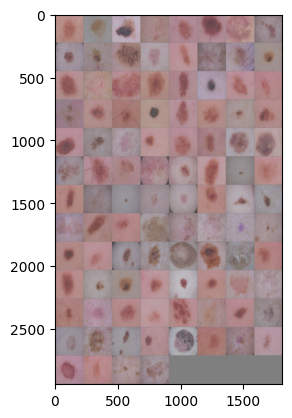

success
------------------ Training Epoch 1 ------------------
>>> Train loss 0.8644791630524965 ---- Accuracy Train 77.82326510234648 
>>> Validation loss 0.3377845410855941 ---- Validation Accuracy 89.11917098445595 
------------------------------ TEST DATA PERFORMANCE -----------------------------------
>>> Validation loss 0.3772270592353331 ---- Validation Accuracy 88.69047619047619 
Loss of 0.3772270592353331 and accuracy of 88.69047619047619


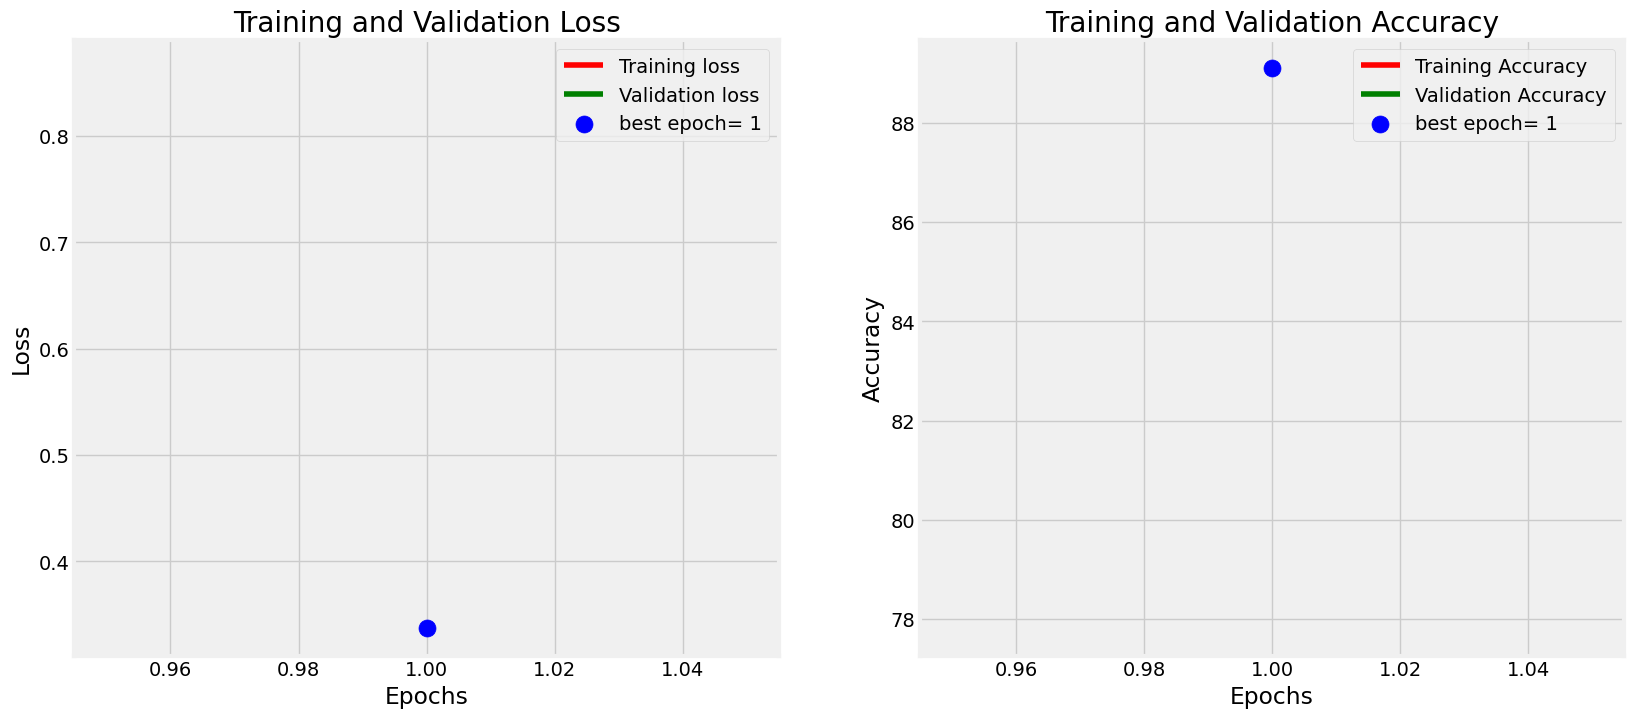

>> Number of Train Data : 10015 -- Batch Size : 200 -- Number of Batch : 51 
>> Number of Validiation Data : 193 -- Batch Size : 100 -- Number of Batch : 2 
>> Number of Test Data : 1512 -- Batch Size : 100 -- Number of Batch : 16 
----------Batch Shape--------
Feature batch shape: torch.Size([200, 3, 224, 224])
----------Labels Shape--------
Labels batch shape: torch.Size([200])


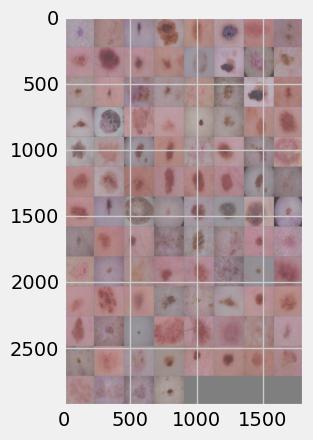

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Swin_S_Weights.IMAGENET1K_V1`. You can also use `weights=Swin_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


success
------------------ Training Epoch 1 ------------------


In [ ]:
num_epochs = 1000
params = [(tr_df_MEL, val_df_MEL, test_df_MEL), (tr_df_NV, val_df_NV, test_df_NV), (tr_df_BCC, val_df_BCC, test_df_BCC), (tr_df_AKIEC, val_df_AKIEC, test_df_AKIEC), (tr_df_BKL, val_df_BKL, test_df_BKL), (tr_df_DF, val_df_DF, test_df_DF), (tr_df_VASC, val_df_VASC, test_df_VASC)]

for param in params:
  train_df, valid_df, test_df = param
  train_df = train_df.reset_index(drop=True)
  valid_df = valid_df.reset_index(drop=True)
  test_df = test_df.reset_index(drop=True)

  training_data = lesion_Dataset(train_df, image_transforms['train'])
  validatin_data = lesion_Dataset(valid_df, image_transforms['valid'])
  test_data = lesion_Dataset(test_df, image_transforms['valid'])

  train_batch_size = 200
  val_batch_size = 100

  train_dataloader = DataLoader(training_data, batch_size=train_batch_size, shuffle=True)
  test_dataloader = DataLoader(validatin_data, batch_size=val_batch_size , shuffle=True)
  final_test_dataloader = DataLoader(test_data, batch_size=val_batch_size , shuffle=True)

  print(">> Number of Train Data : {} -- Batch Size : {} -- Number of Batch : {} ".format(len(train_dataloader.dataset) , train_batch_size , len(train_dataloader)))
  print(">> Number of Validiation Data : {} -- Batch Size : {} -- Number of Batch : {} ".format(len(test_dataloader.dataset) , val_batch_size , len(test_dataloader)))
  print(">> Number of Test Data : {} -- Batch Size : {} -- Number of Batch : {} ".format(len(final_test_dataloader.dataset) , val_batch_size , len(final_test_dataloader)))
  onebatch = iter(train_dataloader)
  train_features, train_labels = next(onebatch)
  print("----------Batch Shape--------")
  print(f"Feature batch shape: {train_features.size()}")
  print("----------Labels Shape--------")
  print(f"Labels batch shape: {train_labels.size()}")


  mean = np.array([0.5, 0.5, 0.5])
  std = np.array([0.25, 0.25, 0.25])

  # Get a batch of training data
  inputs, classes = next(iter(test_dataloader))

  # Make a grid from batch
  out = make_grid(inputs)
  imeshow(out, mean, std)

  model = swin_s(pretrained=True)
  for param in model.parameters():
    param.requires_grad = False

  n_inputs = model.head.in_features
  model.head = nn.Sequential(
      nn.Linear(n_inputs, 512),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(512, 256),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(16, 5)
  )
  model = model.to(device)

  criterion = nn.CrossEntropyLoss()
  criterion = criterion.to(device)
  optimizer = optim.AdamW(model.head.parameters(), lr=0.001)

  print("success")

  history = {  "train_loss" : [] ,  "train_acc" : [] ,  "val_loss" : [] ,  "val_acc" : [] }
  for epoch in range(num_epochs):
    print("------------------ Training Epoch {} ------------------".format(epoch+1))
    T_loss , T_acc = train_model(model , optimizer , criterion, train_dataloader , device)
    V_loss , V_acc = test_model(model , criterion , test_dataloader, device)

    history["train_loss"].append(T_loss)
    history["train_acc"].append(T_acc)
    history["val_loss"].append(V_loss)
    history["val_acc"].append(V_acc)

  print("------------------------------ TEST DATA PERFORMANCE -----------------------------------")
  F_loss , F_acc = test_model(model , criterion , final_test_dataloader, device)
  print(f"Loss of {F_loss} and accuracy of {F_acc}")

  # Define needed variables
  tr_acc = history["train_acc"]
  tr_loss = history["train_loss"]
  val_acc = history["val_acc"]
  val_loss = history["val_loss"]


  index_loss = np.argmin(val_loss)
  val_lowest = val_loss[index_loss]
  index_acc = np.argmax(val_acc)
  acc_highest = val_acc[index_acc]
  Epochs = [i+1 for i in range(len(tr_acc))]
  loss_label = f'best epoch= {str(index_loss + 1)}'
  acc_label = f'best epoch= {str(index_acc + 1)}'

  # Plot training history
  plt.figure(figsize= (20, 8))
  plt.style.use('fivethirtyeight')

  plt.subplot(1, 2, 1)
  plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
  plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
  plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
  plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
  plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout
  plt.show()


